In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

1.12.0


In [4]:
cwd = os.getcwd()

In [5]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(path=cwd+'/data/imdb.npz', num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

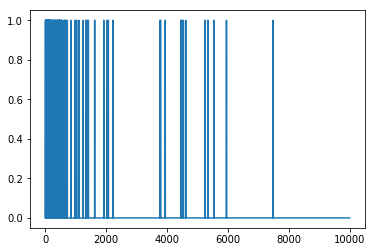

In [6]:
plt.plot(train_data[0])

In [7]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5021 - acc: 0.8027 - binary_crossentropy: 0.5021 - val_loss: 0.3439 - val_acc: 0.8746 - val_binary_crossentropy: 0.3439
Epoch 2/20
 - 5s - loss: 0.2525 - acc: 0.9100 - binary_crossentropy: 0.2525 - val_loss: 0.2845 - val_acc: 0.8877 - val_binary_crossentropy: 0.2845
Epoch 3/20
 - 5s - loss: 0.1831 - acc: 0.9359 - binary_crossentropy: 0.1831 - val_loss: 0.2888 - val_acc: 0.8851 - val_binary_crossentropy: 0.2888
Epoch 4/20
 - 4s - loss: 0.1459 - acc: 0.9501 - binary_crossentropy: 0.1459 - val_loss: 0.3150 - val_acc: 0.8785 - val_binary_crossentropy: 0.3150
Epoch 5/20
 - 5s - loss: 0.1210 - acc: 0.9603 - binary_crossentropy: 0.1210 - val_loss: 0.3423 - val_acc: 0.8739 - val_binary_crossentropy: 0.3423
Epoch 6/20
 - 4s - loss: 0.1002 - acc: 0.9686 - binary_crossentropy: 0.1002 - val_loss: 0.3768 - val_acc: 0.8702 - val_binary_crossentropy: 0.3768
Epoch 7/20
 - 5s - loss: 0.0832 - acc: 0.9752 - binary_crossentropy:

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6437 - acc: 0.6940 - binary_crossentropy: 0.6437 - val_loss: 0.5617 - val_acc: 0.8371 - val_binary_crossentropy: 0.5617
Epoch 2/20
 - 4s - loss: 0.4643 - acc: 0.8692 - binary_crossentropy: 0.4643 - val_loss: 0.4022 - val_acc: 0.8656 - val_binary_crossentropy: 0.4022
Epoch 3/20
 - 4s - loss: 0.3151 - acc: 0.9015 - binary_crossentropy: 0.3151 - val_loss: 0.3202 - val_acc: 0.8837 - val_binary_crossentropy: 0.3202
Epoch 4/20
 - 4s - loss: 0.2409 - acc: 0.9235 - binary_crossentropy: 0.2409 - val_loss: 0.2942 - val_acc: 0.8870 - val_binary_crossentropy: 0.2942
Epoch 5/20
 - 4s - loss: 0.2014 - acc: 0.9358 - binary_crossentropy: 0.2014 - val_loss: 0.2877 - val_acc: 0.8857 - val_binary_crossentropy: 0.2877
Epoch 6/20
 - 4s - loss: 0.1749 - acc: 0.9441 - binary_crossentropy: 0.1749 - val_loss: 0.2861 - val_acc: 0.8862 - val_binary_crossentropy: 0.2861
Epoch 7/20
 - 4s - loss: 0.1549 - acc: 0.9509 - binary_crossentropy:

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 21s - loss: 0.3473 - acc: 0.8543 - binary_crossentropy: 0.3473 - val_loss: 0.2934 - val_acc: 0.8818 - val_binary_crossentropy: 0.2934
Epoch 2/20
 - 20s - loss: 0.1356 - acc: 0.9506 - binary_crossentropy: 0.1356 - val_loss: 0.3616 - val_acc: 0.8614 - val_binary_crossentropy: 0.3616
Epoch 3/20
 - 21s - loss: 0.0434 - acc: 0.9876 - binary_crossentropy: 0.0434 - val_loss: 0.4344 - val_acc: 0.8677 - val_binary_crossentropy: 0.4344
Epoch 4/20
 - 23s - loss: 0.0067 - acc: 0.9992 - binary_crossentropy: 0.0067 - val_loss: 0.5910 - val_acc: 0.8702 - val_binary_crossentropy: 0.5910
Epoch 5/20
 - 20s - loss: 8.8934e-04 - acc: 1.0000 - binary_crossentropy: 8.8934e-04 - val_loss: 0.6743 - val_acc: 0.8694 - val_binary_crossentropy: 0.6743
Epoch 6/20
 - 20s - loss: 2.5767e-04 - acc: 1.0000 - binary_crossentropy: 2.5767e-04 - val_loss: 0.7184 - val_acc: 0.8706 - val_binary_crossentropy: 0.7184
Epoch 7/20
 - 19s - loss: 1.4191e-04 - acc: 1.

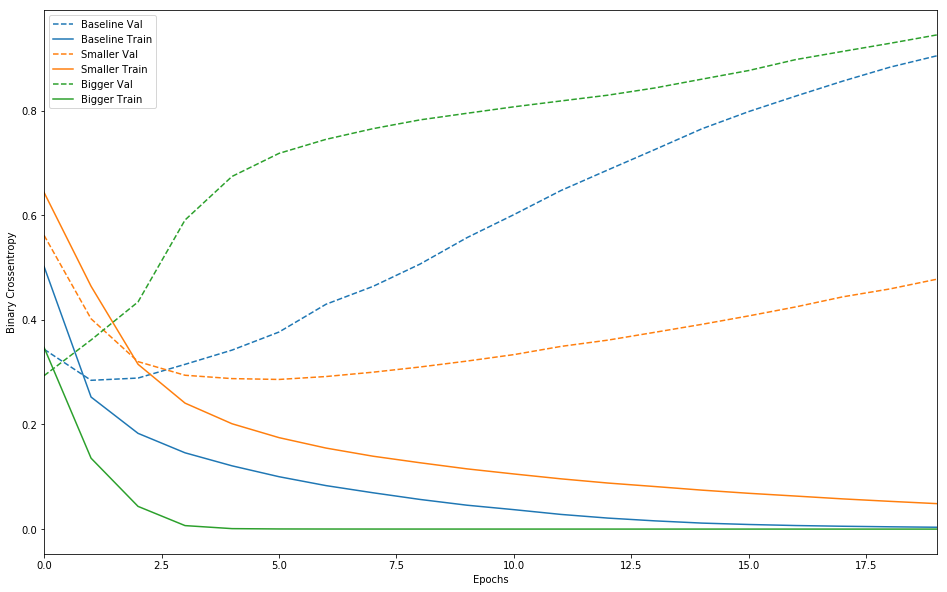

In [13]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5531 - acc: 0.7885 - binary_crossentropy: 0.5149 - val_loss: 0.3962 - val_acc: 0.8728 - val_binary_crossentropy: 0.3559
Epoch 2/20
 - 3s - loss: 0.3161 - acc: 0.9055 - binary_crossentropy: 0.2702 - val_loss: 0.3372 - val_acc: 0.8866 - val_binary_crossentropy: 0.2874
Epoch 3/20
 - 3s - loss: 0.2611 - acc: 0.9264 - binary_crossentropy: 0.2087 - val_loss: 0.3374 - val_acc: 0.8856 - val_binary_crossentropy: 0.2830
Epoch 4/20
 - 3s - loss: 0.2354 - acc: 0.9386 - binary_crossentropy: 0.1795 - val_loss: 0.3479 - val_acc: 0.8832 - val_binary_crossentropy: 0.2911
Epoch 5/20
 - 3s - loss: 0.2220 - acc: 0.9449 - binary_crossentropy: 0.1636 - val_loss: 0.3603 - val_acc: 0.8794 - val_binary_crossentropy: 0.3011
Epoch 6/20
 - 3s - loss: 0.2089 - acc: 0.9496 - binary_crossentropy: 0.1491 - val_loss: 0.3736 - val_acc: 0.8768 - val_binary_crossentropy: 0.3135
Epoch 7/20
 - 3s - loss: 0.2018 - acc: 0.9520 - binary_crossentropy:

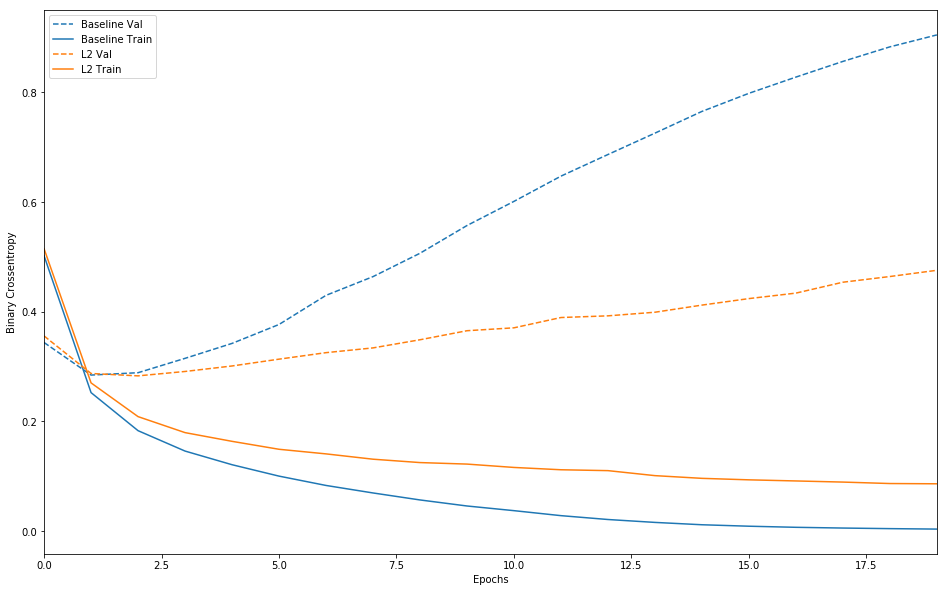

In [15]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [16]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6253 - acc: 0.6397 - binary_crossentropy: 0.6253 - val_loss: 0.4820 - val_acc: 0.8541 - val_binary_crossentropy: 0.4820
Epoch 2/20
 - 3s - loss: 0.4521 - acc: 0.8066 - binary_crossentropy: 0.4521 - val_loss: 0.3290 - val_acc: 0.8820 - val_binary_crossentropy: 0.3290
Epoch 3/20
 - 3s - loss: 0.3452 - acc: 0.8695 - binary_crossentropy: 0.3452 - val_loss: 0.2853 - val_acc: 0.8887 - val_binary_crossentropy: 0.2853
Epoch 4/20
 - 3s - loss: 0.2791 - acc: 0.9004 - binary_crossentropy: 0.2791 - val_loss: 0.2753 - val_acc: 0.8876 - val_binary_crossentropy: 0.2753
Epoch 5/20
 - 3s - loss: 0.2390 - acc: 0.9188 - binary_crossentropy: 0.2390 - val_loss: 0.2796 - val_acc: 0.8875 - val_binary_crossentropy: 0.2796
Epoch 6/20
 - 3s - loss: 0.2072 - acc: 0.9312 - binary_crossentropy: 0.2072 - val_loss: 0.2881 - val_acc: 0.8859 - val_binary_crossentropy: 0.2881
Epoch 7/20
 - 3s - loss: 0.1825 - acc: 0.9388 - binary_crossentropy:

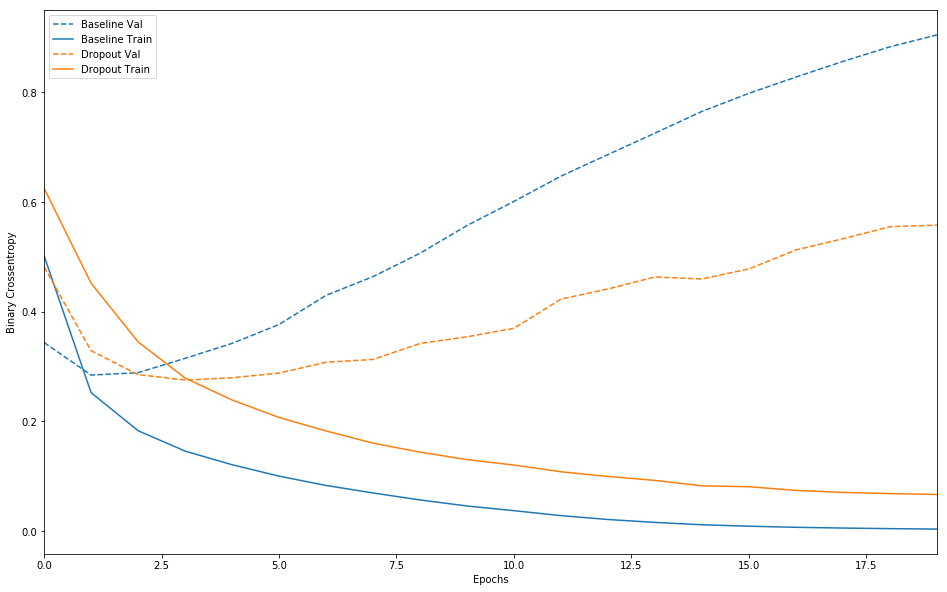

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Here the most common ways to prevent overfitting in neural networks:

* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.